# Phase 4: Regression Models with Random Forest
Shreya Das

In phase 4, we will creating our first regression ML model based on the descriptors calculated in the previous phase. Lastly, we will evaluate the performance of this regression model by comparing the predicted and experimental pIC50 values.

NOTE: The structure and layout of this phase and the project is inspired by The Data Professor on Youtube. The findings for RET molecules and drugs are original and investigated by the author (Shreya Das).
## 1. Import libraries

Here, we will be using **scikit-learn** which is a ML module for python. This module allows for different ML models such as classification, regression, and clustering. As mentioned before we will be using the regression model.

**Regression** is defined as a supervised ML technique that can be used to predict continuous variables. The end goal of regression modeling is to create a line of best-fit to be able to extrapolate data.

**Supervised ML techniques** are defined as a technique that uses labelled datasets to train ML models. In the previous phase, we labelled the data, thus, we are using a supervised ML technique. **Unsupervised ML techniques** are techniques that uses unlabelled datasets to train ML models. **Semi-supervised ML techniques** are techniques that uses both labelled and unlabelled datasets to train ML models

In [ ]:
! pip install scikit-learn

The **train_test_split** function is used to split a given dataset randomnly into a train and test dataset. When creating ML models, it is crucial that you have train and test datasets; in order to make sure that your model is trained properly, you need the test dataset.

**RandomForestRegressor** is the specific regressor ML model that we will generate.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 2. Load the data set
Retrieve the "RET_04_bioactivity_data_pIC50_pubchem_fp.csv" file from Github and read it in. Remember that is this the .csv file from the previous phase that contains the calculated molecular descriptors for RET and the associated pIC50 values.

In [ ]:
! wget https://github.com/Shreya-Das-uoft/Chembl-Database-Drug-Discovery-for-RET-tyrosine-kinase-receptor-in-neuroblastoma/blob/main/RET_04_bioactivity_data_pIC50_pubchem_fp.csv

--2024-09-05 14:36:14--  https://github.com/Shreya-Das-uoft/Chembl-Database-Drug-Discovery-for-RET-tyrosine-kinase-receptor-in-neuroblastoma/blob/main/RET_04_bioactivity_data_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘RET_04_bioactivity_data_pIC50_pubchem_fp.csv’

RET_04_bioactivity_     [   <=>              ]   1.70M  3.77MB/s    in 0.5s    

2024-09-05 14:36:15 (3.77 MB/s) - ‘RET_04_bioactivity_data_pIC50_pubchem_fp.csv’ saved [1783655]



In [ ]:
df = pd.read_csv('RET_04_bioactivity_data_pIC50_pubchem_fp.csv')

## 3. Input features
The **RET** data set contains 896 input features and 1 output variable (pIC50 values)
### 3.1. Input features
We create another data frame without pIC50 values and save it under the variable 'X' (X is a data frame that only contains the calculated molecular descriptors, without the pIC50 values). We will then take the pIC50 values and save it under the variable 'Y'.

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
892,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
893,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
894,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 3.2. Output features

In [ ]:
Y = df.pIC50
Y

,pIC50
0,5.000000
1,4.397940
2,7.508638
3,5.080922
4,5.721246
...,...
891,6.866461
892,7.950782
893,7.920819
894,7.522879


### 3.3 Let's examine the data dimension

In [ ]:
X.shape

(896, 881)

In [ ]:
Y.shape

(896,)

Seems like everything is good. We know that 896 drug candidates have been identified in the previous phase.

### 3.4. Remove low variance features
We remove low variance features because they are not likely to change the model in a significant way. However, it is always important to consider if removing these features would improve or nagtively impact the model.

To remove the low variance features, we set a variance threshold and any feature that above this threshold will be kept.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(896, 156)

## 4. Data split (80/20 ratio)
We split the X and Y datsset into 80/20 where 20% of the data is the test dataset and 80% is train dataset.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((716, 156), (716,))

In [ ]:
X_test.shape, Y_test.shape

((180, 156), (180,))

## 5. Building a Regression Model using Random Forest
The Random Forest Regression Model makes prediction using multiple decision trees to make better prediction.

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4307639155879559

In [ ]:
Y_pred = model.predict(X_test)

## 6. Scatter Plot of Experimental vs. Predicted pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

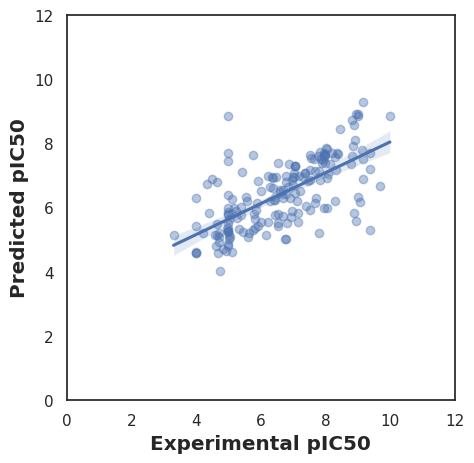

In [ ]:
import matplotlib.pyplot as plt

sns.set(color_codes = True)
sns.set_style('white')

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws = {'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_ylabel('Predicted pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
import scipy.stats
scipy.stats.pearsonr(Y_test, Y_pred)

PearsonRResult(statistic=0.6721683191731076, pvalue=5.135856942443518e-25)